# MHKiT WPTO Hindcast Example

This example loads data from the [WPTO hindcast data set](https://registry.opendata.aws/wpto-pds-us-wave/), hosted on AWS.  

## Dataset Description

The high-spatial-resolution dataset (hereafter the *'3-hour' dataset*) currently spans the U.S. Exclusive Economic Zone (EEZ) along the West coast and around Hawaii with an unstructured grid that has ~200 m resolution in shallow water. The time step resolution for this spatial data is 3-hours and spans 32 years, 01/01/1979  - 12/31/2010.

The 'virtual buoy dataset' (hereafter the *'1-hour' dataset*) is also available at specific locations within the large spatial domain. These virtual buoys span the same 32-years of the spatial dataset however the time resolution is 1-hour.

### Included 3-hour Variables: 
- Dataset variables included are indexed by **'coordinates'** (latitude and longitude), and a **'time_index'**. These variables can be accessed through the `request_wpto_point_data` function.  

| Variable Name | Units |
| :------------ | :---: |
| energy_period | seconds |
| maximum_energy_period | degrees_true |
| mean_absolute_period | seconds |
| mean_zero-crossing_period | seconds |
| omni-directional_wave_power | Watts |
| peak_period | seconds |
| significant_wave_height | meters |
| water_depth | meters |
| spectral_width | none |
| directionality_coefficient | none |


### Included 1-hour Variables:
- This dataset includes **all variables** in the spatial dataset as well as:
  
| Variable Name | Units |
| :------------ | :---: |
| maximum_energy_direction | degrees_true |
| mean_wave_direction | degrees_true |
| frequency_bin_edges | Hz |

These variables can be accessed through the `request_wpto_point_data` function.

### Directional Wave Spectra
- The 1-hour data also contains directional wave spectra which can be accessed one year at time throught the `request_wpto_directional_spectrum` function. 



### Setting up Access to WPTO Hindcast Data
To access the WPTO hindcast data, you will need to configure h5pyd for data access on HSDS. 
        To get your own API key, visit https://developer.nrel.gov/signup/. 

To configure h5phd type:

    hsconfigure
        
and enter at the prompt:

    hs_endpoint = https://developer.nrel.gov/api/hsds
    hs_username = None
    hs_password = None
    hs_api_key = {your key}

 
## Using the WPTO Hindcast MHKiT Functions

In this section we will walk through an example to request hindcast data at a point using MHKiT. To start we will import the MHKiT wave module.

In [1]:
from mhkit import wave

### 1. Check if Lat/Lon pair is in WPTO Hindcast Dataset
You can check to see if your desired data location is included in the WPTO Hindcast dataset using the `region_selection` function. If a valid lat/lon pair is passed, the name of the hindcast region is passed back, otherwise a message indicating that the pair is out or range is printed to the screen. 

In [2]:
lat_lon = [44.624076,-124.280097]
region = wave.io.hindcast.region_selection(lat_lon)
print(region)

West_Coast


### 2. Download WPTO Hindcast Data from a Single Location

In this example we will request 3-hour significant wave height for 1995 at the point (44.624076,-124.280097, near the PacWave site). We will speficy each of these as a variable and pass them to the wave IO hindacast function `request_wpto_dataset`. The data type will be a high-spatial-resolution dataset,  year(s) will be 1995,  latitude/longitude pairs will be for a point near PacWave, and the parameter will be significant wave height.

In [3]:
data_type = '3-hour' # setting the data type to the 3-hour dataset
years = [1995]
lat_lon = (44.624076,-124.280097) 
parameter = 'significant_wave_height' 

Hs, metadata= wave.io.hindcast.request_wpto_point_data(data_type,parameter,lat_lon,years)

#### View the metadata
We can check the metadata of our request to find information such as water depth, distance to shore, timezone (offset from UTC), and jurisdiction. 

In [4]:
metadata

,water_depth,latitude,longitude,distance_to_shore,timezone,jurisdiction
0,77.429497,44.624298,-124.278999,15622.175781,-8,Federal


#### Hindacast Data Returned 

We can also take a look at the first 5 rows of the returned data by call the `head()` method on the returned data. By calling this below we can see that the returned data has a time index and a single column of significant wave height. The siginifcant wave height column has a 0 integer on the end of it reffering to the index in the metadata. In out next example the importance of this integer will become more clear as we begin to request multiple locations.

In [5]:
Hs.head()

,significant_wave_height_0
time_index,
1995-01-01 00:00:00+00:00,2.35354
1995-01-01 03:00:00+00:00,2.39468
1995-01-01 06:00:00+00:00,2.45756
1995-01-01 09:00:00+00:00,2.55913
1995-01-01 12:00:00+00:00,2.66992


### 3. Download WPTO Hindcast Data from Multiple Locations

Multiple locations can be requested by passing a list or tuple of lat/lon pairs. This time we will request the 3-hour energy period at two points. The data type and years requested remanin the same as before. By looking at the `head` of the returned DataFrame we can see that this time two energy periods are returned. The integers on each of the energy periods refer to the index in the metadata. This allows the user to connect the quantities of interest and the metadata fro each point.

In [6]:
parameter = 'energy_period'
lat_lon = ((44.624076,-124.280097),
           (43.489171,-125.152137)) 

Te, metadata = wave.io.hindcast.request_wpto_point_data(data_type, parameter, lat_lon, years)

# View Te from two locations
Te.head()

,energy_period_0,energy_period_1
time_index,,
1995-01-01 00:00:00+00:00,10.3433,10.1760
1995-01-01 03:00:00+00:00,10.2281,10.2641
1995-01-01 06:00:00+00:00,10.0164,10.1792
1995-01-01 09:00:00+00:00,10.0484,10.2410
1995-01-01 12:00:00+00:00,10.6579,10.5877


In [7]:
metadata

,water_depth,latitude,longitude,distance_to_shore,timezone,jurisdiction
0,77.429497,44.624298,-124.278999,15622.175781,-8,Federal
1,1337.407959,43.496300,-125.152000,64236.390625,-8,Federal


### 4. Download WPTO Hindcast Data from Multiple Years

Multiple years can be requested simply by adding years to the passed list. Recall the hindcast data spans  01/01/1979  - 12/31/2010. A demonstration of requesting multiple years of 3-hour data for a single point is shown below. By looking at the the returned data we can see that the data is returned in the order of the years passed to the function. 

In [8]:
years = [1995, 1996] 
parameter = 'omni-directional_wave_power'
lat_lon = (44.624076,-124.280097) 

J, metadata= wave.io.hindcast.request_wpto_point_data(data_type,parameter,lat_lon,years) 

J

,omni-directional_wave_power_0
time_index,
1995-01-01 00:00:00+00:00,30134.0
1995-01-01 03:00:00+00:00,30805.0
1995-01-01 06:00:00+00:00,31709.0
1995-01-01 09:00:00+00:00,34476.0
1995-01-01 12:00:00+00:00,39892.0
...,...
1996-12-31 09:00:00+00:00,154849.0
1996-12-31 12:00:00+00:00,120543.0
1996-12-31 15:00:00+00:00,108288.0


In [9]:
metadata

,water_depth,latitude,longitude,distance_to_shore,timezone,jurisdiction
0,77.429497,44.624298,-124.278999,15622.175781,-8,Federal


### 5. Download 1-hour data
1-hour temporal resolutions data can be requested by passing '1-hour' as the data_type. An example for requesting this higer temporal data is below. 

In [10]:
data_type = '1-hour' # Setting the data_type to 1 hour data
years = [1995] 
parameter = ['significant_wave_height','peak_period','mean_wave_direction']
lat_lon = (44.624076,-124.280097) 

data, metadata= wave.io.hindcast.request_wpto_point_data(data_type,parameter,lat_lon,years) 

In looking at the returned data we see that the data is at an hourly temporal resolution. 


In [11]:
data.head()

,significant_wave_height_0,peak_period_0,mean_wave_direction_0
time_index,,,
1995-01-01 01:00:00+00:00,2.484366,14.662757,15.084534
1995-01-01 02:00:00+00:00,2.630712,14.662757,25.247620
1995-01-01 03:00:00+00:00,2.593185,14.662757,26.125366
1995-01-01 04:00:00+00:00,2.563252,14.662757,26.771942
1995-01-01 05:00:00+00:00,2.534683,14.662757,27.553558


### 6. Calculate a Directional JPD
Using numpy, we can calculate a directional JPD using the 1-hour data requested above. 

In [12]:
from numpy import histogramdd, array, arange, mean

# Generate bins for Hm0, Te and Direction
Hm0_bins = arange(0, data.significant_wave_height_0.values.max() + 0.5, 0.5)    
Te_bins = arange(0, data.peak_period_0.values.max() + 1, 1)
Dir_bins = arange(0, data.mean_wave_direction_0.values.max() + 10, 10)

# Combine data for better handling
jpd_3d = array([
                    data.significant_wave_height_0.values.flatten(),
                    data.peak_period_0.values.flatten(),
                    data.mean_wave_direction_0.values.flatten()
                ]).T

# Calculate the bin centers of the data
Hm0_center = array([
                    mean([Hm0_bins[i+1],Hm0_bins[i]]) 
                    for i in range(Hm0_bins.shape[0]-1)
                ])
Te_center = array([
                    mean([Te_bins[i+1],Te_bins[i]]) 
                    for i in range(Te_bins.shape[0]-1)
                ])
Dir_center = array([
                    mean([Dir_bins[i+1],Dir_bins[i]]) 
                    for i in range(Dir_bins.shape[0]-1)
                ])


# Calculate the JPD for Hm0, Te, and Dir 
probability, edges = histogramdd(jpd_3d,bins=[Hm0_bins,Te_bins,Dir_bins],density=True)

We can then plot the directional JPD using matplotlib. Click along the slider below to the 
plot to view the JPD for each incoming wave direction. 

<IPython.core.display.Javascript object>


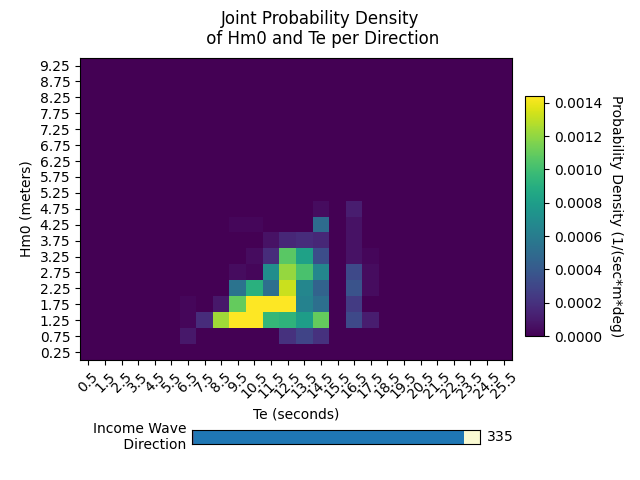

Text(0.5, 0.98, 'Joint Probability Density\n of Hm0 and Te per Direction')

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
from numpy import arange
from matplotlib.widgets import Slider


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.8, bottom=0.25)

d = 0
plot_jpd = probability[:,:,d]

im = ax.imshow(plot_jpd, origin='lower', aspect='auto')

axcolor = 'lightgoldenrodyellow'
axDir = plt.axes([0.3, 0.075, 0.45, 0.03], facecolor=axcolor)

newD = Slider(axDir, 'Income Wave\n Direction', 5, 355, valinit=d, valstep=10)

def update(val):
    d = int(newD.val/10)
    im.set_data(probability[:,:,d])
    fig.canvas.draw()

newD.on_changed(update)

cax = fig.add_axes([0.82, 0.3, 0.03, 0.5])
cbar = fig.colorbar(im, cax=cax, orientation='vertical')

cbar.set_label('Probability Density (1/(sec*m*deg)', rotation=270, labelpad=15)

ax.set_xlabel('Te (seconds)')
ax.set_ylabel('Hm0 (meters)')

ax.set_xticks(arange(len(Te_center)))
ax.set_yticks(arange(len(Hm0_center)))
ax.set_xticklabels(Te_center,rotation=45)
ax.set_yticklabels(Hm0_center)

fig.suptitle('Joint Probability Density\n of Hm0 and Te per Direction')


### 7. Download Directional Spectra Data
1-hour directional wave spectra data can be downloaded using `request_wpto_directional_spectrum`. The spectra data will be returned as an xarray while the metadata will be returned as as Pandas DataFrame. 


In [14]:
year = '1993'  # only one year can be passed at at time as a string
dir_spectra,meta = wave.io.hindcast.request_wpto_directional_spectrum(lat_lon,year)

print(dir_spectra)

<xarray.Dataset>
Dimensions:     (direction: 24, frequency: 29, time_index: 8748)
Coordinates:
  * time_index  (time_index) object 725850000000000000 ... 757378800000000000
  * frequency   (frequency) float64 0.035 0.0385 0.0424 ... 0.4173 0.4591 0.505
  * direction   (direction) float64 7.5 22.5 37.5 52.5 ... 322.5 337.5 352.5
Data variables:
    87          (time_index, frequency, direction) float32 0.0 0.0 ... 4.535e-05
